# Malan Moody
# Project 2

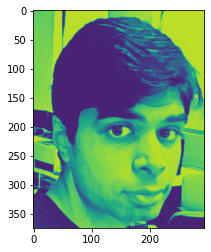

In [166]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pylsd import lsd

#Read gray image
img = cv2.imread("photo1.jpg",0)

plt.imshow(img)

Run line segment detection on image and create new image with only lines

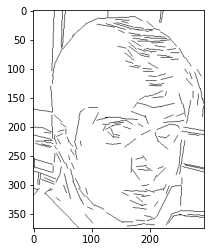

In [167]:
segments = lsd(img)

lines = 255 * np.ones(shape=[img.shape[0], img.shape[1], 3], dtype=np.uint8)
for i in range(segments.shape[0]):
    pt1 = (int(segments[i, 0]), int(segments[i, 1]))
    pt2 = (int(segments[i, 2]), int(segments[i, 3]))
    cv2.line(lines, pt1, pt2, (0, 0, 0), 1)

plt.imshow(lines)

1.) Find the number of line segments in the image

We have this number from when lsd was performed

In [168]:
print("Number of Line Segments: ",len(segments))

Number of Line Segments:  253


2.) Find the longest line segment in the image

Longest line is shown in red on the image

Longest Line Length:  104.0768946500615


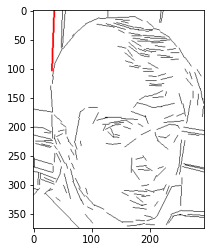

In [169]:
maxLength = 0
maxLengthLine = 0
for i in range(segments.shape[0]):
    pt1 = (int(segments[i, 0]), int(segments[i, 1]))
    pt2 = (int(segments[i, 2]), int(segments[i, 3]))    
    length = np.sqrt((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)
    if length > maxLength:
        maxLength = length
        maxLengthLine = i

maxpt1 = (int(segments[maxLengthLine, 0]), int(segments[maxLengthLine, 1]))
maxpt2 = (int(segments[maxLengthLine, 2]), int(segments[maxLengthLine, 3]))
cv2.line(lines, maxpt1, maxpt2, (255, 0, 0), 2)        

print('Longest Line Length: ', maxLength)
plt.imshow(lines)    

3.) Compute centroid points and two extreme points for each line segment and save to text file

For line segments, the centroid is the midpoint between the two extreme points 

On the image, midpoint values are rounded from float to int to be able to center on a pixel

Centroids are shown in blue and extreme points are shown in green

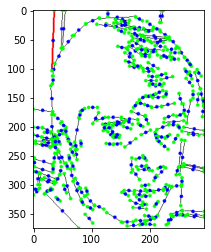

In [170]:
centroids = ""
for i in range(segments.shape[0]):
    pt1 = (int(segments[i, 0]), int(segments[i, 1]))
    pt2 = (int(segments[i, 2]), int(segments[i, 3]))
    midpt = ((pt1[0]+pt2[0])/2, (pt1[1]+pt2[1])/2)
    midptRounded = (round((pt1[0]+pt2[0])/2), round((pt1[1]+pt2[1])/2))
    centroids += 'pt1:('+str(pt1[0])+', '+str(pt1[1])+'), '
    centroids += 'pt2:('+str(pt2[0])+', '+str(pt2[1])+'), '
    centroids += 'centroid:('+str(midpt[0])+', '+str(midpt[1])+') \n'
    cv2.circle(lines, pt1, 3, (0, 255, 0), -1)
    cv2.circle(lines, pt2, 3, (0, 255, 0), -1)
    cv2.circle(lines, midptRounded, 3, (0, 0, 255), -1)
    
f = open("centroids.txt", "w")
f.write(centroids)
f.close()    
    
plt.imshow(lines)     